# Section 3: Explainability Analysis and Ablation Studies
## Dry Bean Dataset - Model Interpretability

This notebook provides comprehensive explainability analysis and ablation studies for the trained models.

**Analysis Components:**
- **Feature Importance**: Built-in and permutation-based importance
- **SHAP Analysis**: Shapley Additive Explanations for model predictions
- **LIME Analysis**: Local Interpretable Model-agnostic Explanations
- **Ablation Studies**: Feature ablation, hyperparameter sensitivity
- **Cross-Model Comparison**: Feature importance consensus across models

**Models Analyzed:**
- XGBoost, TabPFN v2, TabICL
- Focus on understanding what drives model decisions
- Identify most important features for dry bean classification

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our custom analysis frameworks
from explainability_analysis import ExplainabilityAnalyzer, save_intermediate_results, clear_memory, load_intermediate_results
from ablation_studies import AblationStudyAnalyzer
from enhanced_ablation_studies import run_enhanced_ablation_studies

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 Section 3: Explainability Analysis and Ablation Studies")
print("Dataset: Dry Bean Classification")

🔍 Section 3: Explainability Analysis and Ablation Studies
Dataset: Dry Bean Classification


## 3.1 Load Trained Models and Data

In [2]:
# Load trained models and results from Section 2
import pickle

try:
    with open('dry_bean_section2_results.pkl', 'rb') as f:
        section2_data = pickle.load(f)
    
    # Extract variables
    models = section2_data['models']
    evaluator = section2_data['evaluator']
    X_train_scaled = section2_data['X_train_scaled']
    X_val_scaled = section2_data['X_val_scaled']
    X_test_scaled = section2_data['X_test_scaled']
    y_train = section2_data['y_train']
    y_val = section2_data['y_val']
    y_test = section2_data['y_test']
    feature_names = section2_data['feature_names']
    class_mapping = section2_data['class_mapping']
    class_names = section2_data['class_names']
    label_encoder = section2_data['label_encoder']
    comparison_df = section2_data['comparison_df']
    
    print("✅ Section 2 results loaded successfully!")
    print(f"Models available: {list(models.keys())}")
    print(f"Features: {len(feature_names)}")
    print(f"Classes: {len(class_names)}")
    print(f"Test samples: {len(X_test_scaled):,}")
    
except FileNotFoundError:
    print("❌ Section 2 results not found!")
    print("Please run Section 2 (Model Training) notebook first.")
    raise

✅ Section 2 results loaded successfully!
Models available: ['XGBoost', 'TabPFN v2', 'TabICL', 'FT-Transformer']
Features: 16
Classes: 7
Test samples: 2,723


## 3.2 Initialize Explainability Analyzer

In [3]:
# Initialize explainability analyzer with dry bean feature names
explainer = ExplainabilityAnalyzer(feature_names=feature_names)

print("🔧 Explainability analyzer initialized")
print(f"Feature names: {feature_names[:5]}...")
print(f"Total features: {len(feature_names)}")
print(f"Class names: {class_names}")

🔧 Explainability analyzer initialized
Feature names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio']...
Total features: 16
Class names: ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']


## 3.3 XGBoost Explainability Analysis


XGBOOST EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for XGBoost


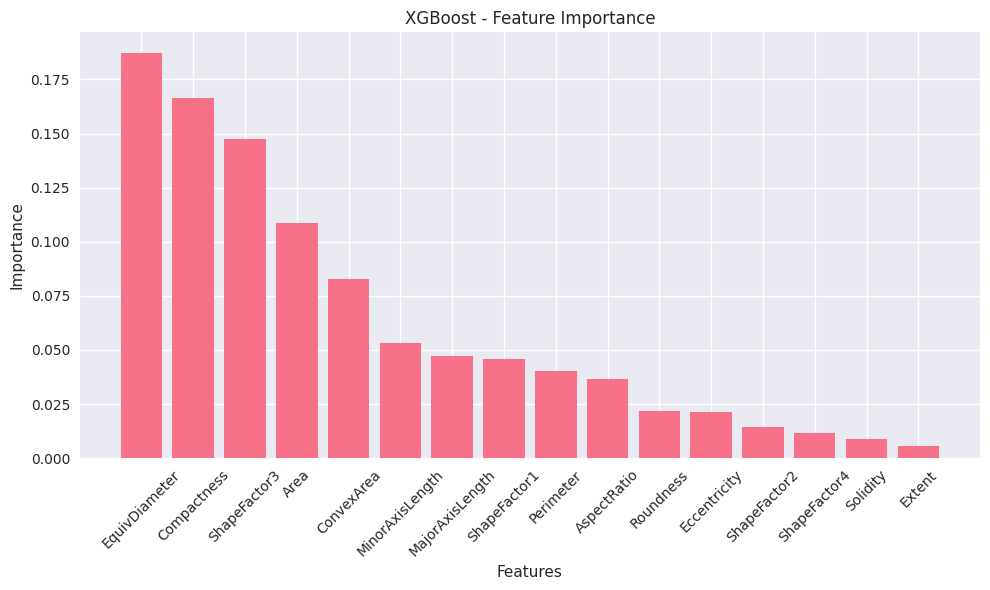

✅ Feature importance analysis completed for XGBoost
🔄 Computing permutation importance for XGBoost...


<Figure size 800x550 with 0 Axes>

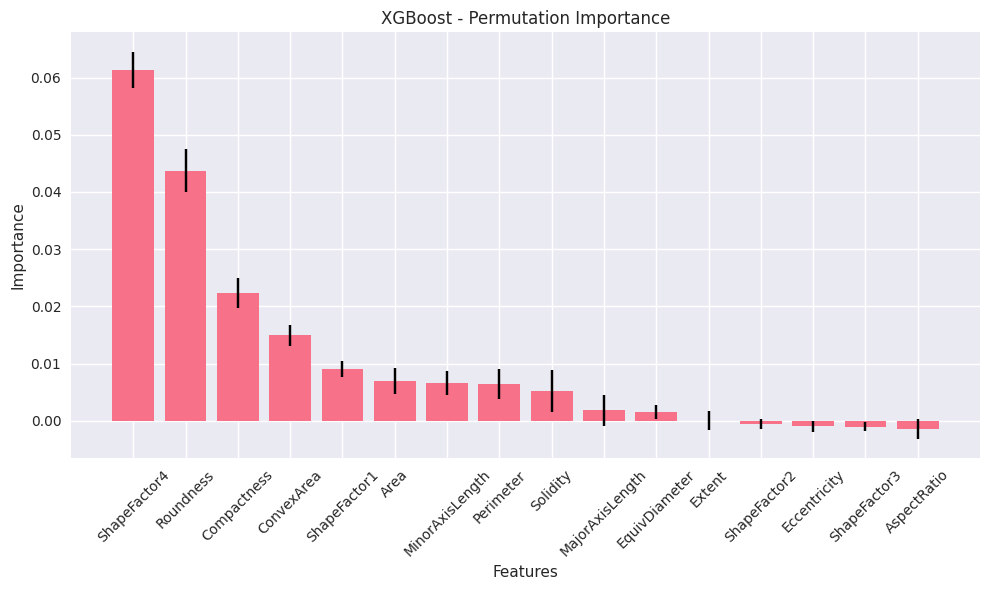

✅ Permutation importance analysis completed for XGBoost
🔄 Computing SHAP values for XGBoost...
🧹 Memory cleared
   Processing batch 1/10
🧹 Memory cleared
   Processing batch 2/10
🧹 Memory cleared
   Processing batch 3/10
🧹 Memory cleared
   Processing batch 4/10
🧹 Memory cleared
   Processing batch 5/10
🧹 Memory cleared
   Processing batch 6/10
🧹 Memory cleared
   Processing batch 7/10
🧹 Memory cleared
   Processing batch 8/10
🧹 Memory cleared
   Processing batch 9/10
🧹 Memory cleared
   Processing batch 10/10
🧹 Memory cleared


<Figure size 800x550 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

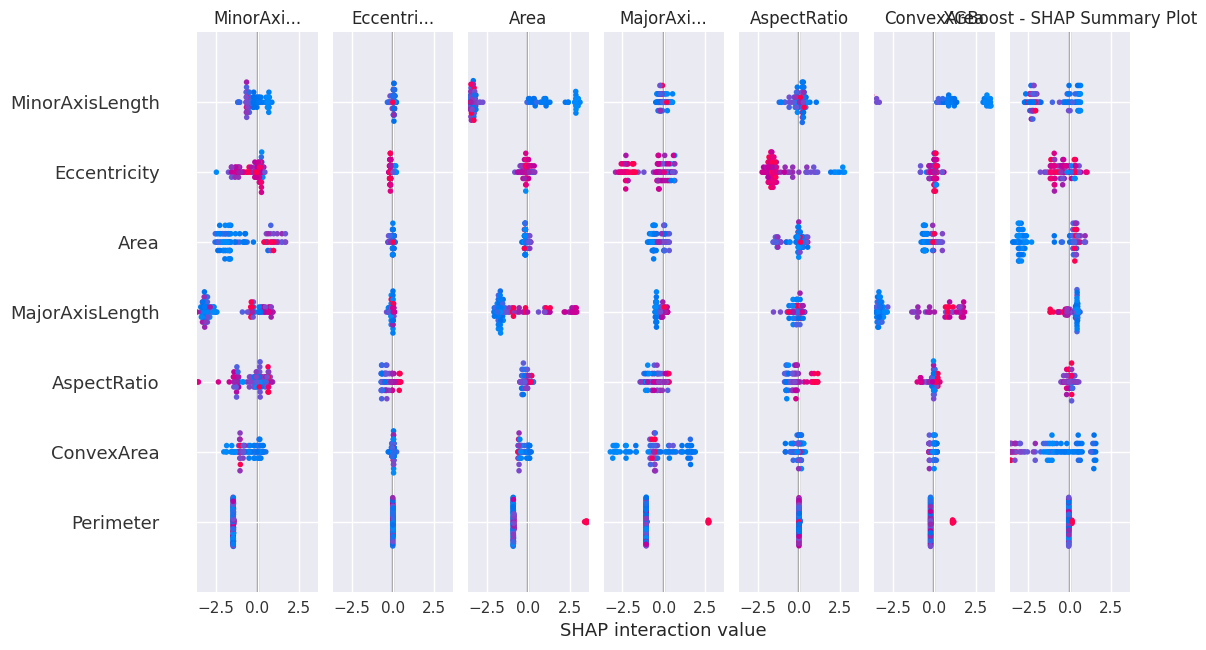

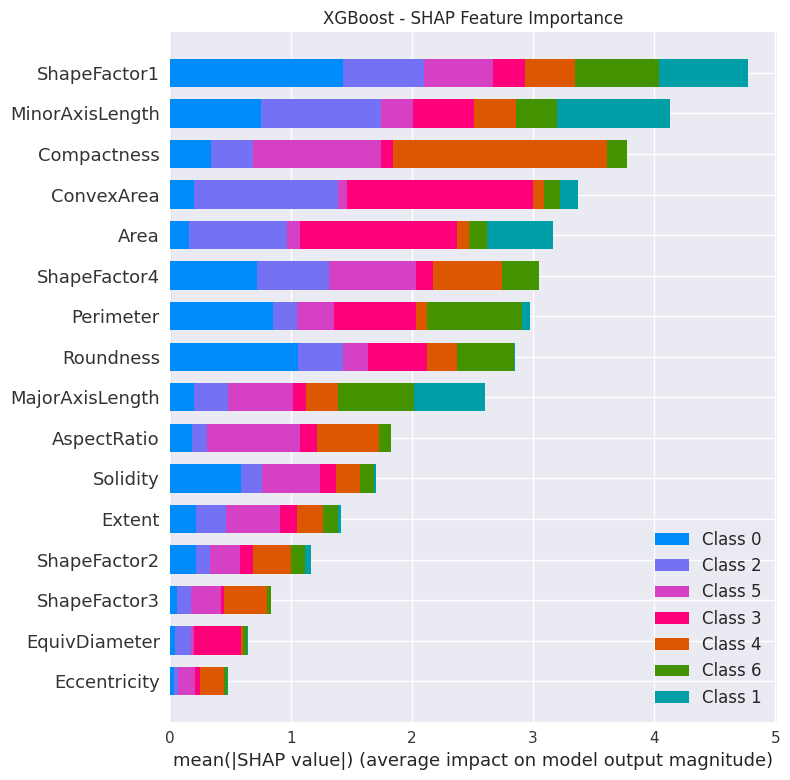

✅ SHAP analysis completed for XGBoost
🔄 Computing LIME explanations for XGBoost...


<Figure size 800x550 with 0 Axes>

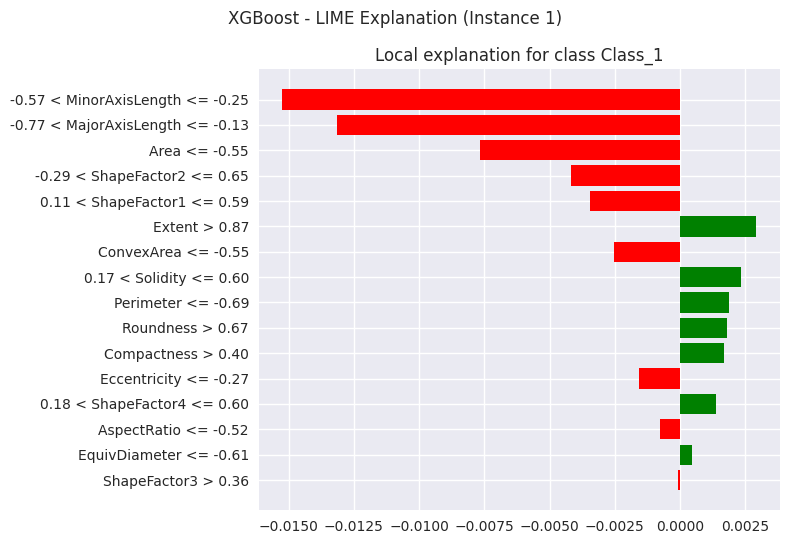

<Figure size 800x550 with 0 Axes>

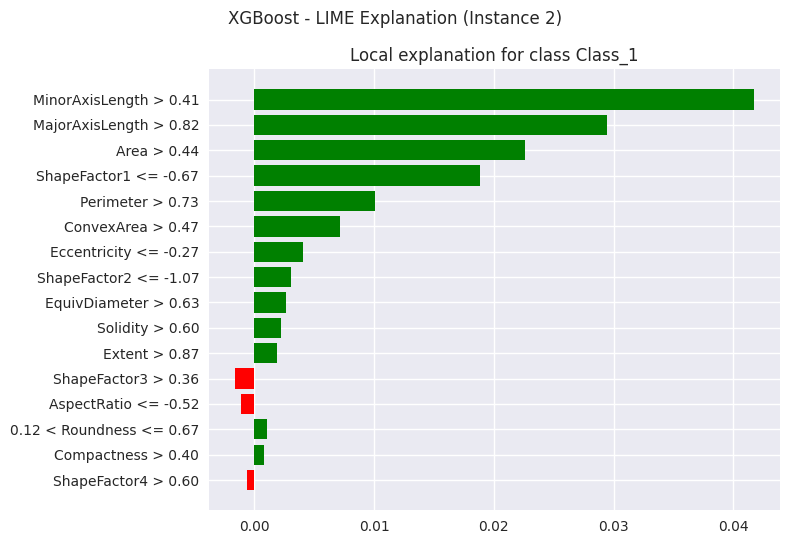

<Figure size 800x550 with 0 Axes>

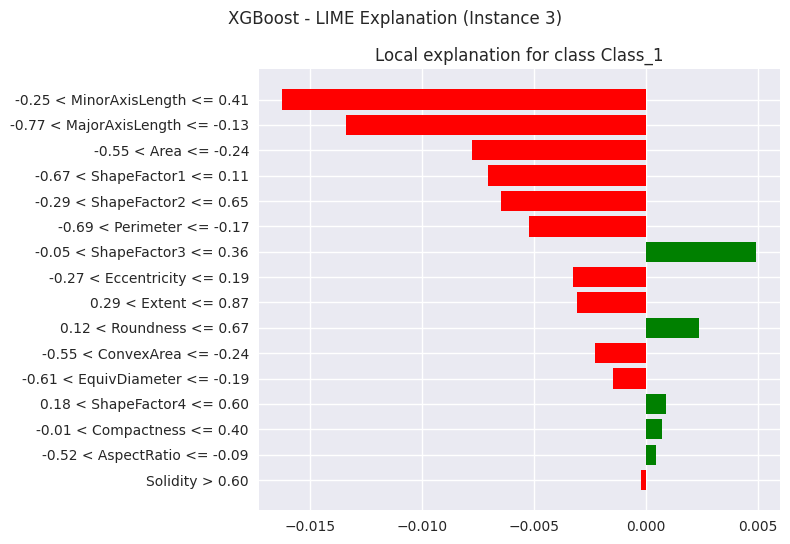

✅ LIME analysis completed for XGBoost
💾 Intermediate results saved to dry_bean_xgb_explanations.pkl
✅ XGBoost explainability analysis completed
🧹 Memory cleared


<Figure size 800x550 with 0 Axes>

In [4]:
# Analyze XGBoost explainability (most interpretable)
if 'XGBoost' in models:
    print("\n" + "="*60)
    print("XGBOOST EXPLAINABILITY ANALYSIS")
    print("="*60)
    
    xgb_explanations = explainer.analyze_model_explainability(
        models['XGBoost'], "XGBoost", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=100
    )

        # Save intermediate results
    save_intermediate_results({
        'xgb_explanations': xgb_explanations,
        'explainer_state': explainer.explanations
    }, 'dry_bean_xgb_explanations.pkl')
    
    print("✅ XGBoost explainability analysis completed")
    clear_memory()
    
else:
    print("⚠️ XGBoost model not available")

## 3.4 TabPFN v2 Explainability Analysis

In [ ]:
# Analyze TabPFN v2 explainability
if 'TabPFN v2' in models:
    print("\n" + "="*60)
    print("TABPFN V2 EXPLAINABILITY ANALYSIS")
    print("="*60)
    
    tabpfn_explanations = explainer.analyze_model_explainability(
        models['TabPFN v2'], "TabPFN v2", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=100
    )
    
        # Save intermediate results after TabPFN
    intermediate_data = {
        'explainer_state': explainer.explanations,
        'tabpfn_explanations': tabpfn_explanations,
        'models_completed': ['XGBoost', 'TabPFN v2']
    }
    save_intermediate_results(intermediate_data, 'dry_bean_tabpfn_explanations.pkl')
    
    print("✅ TabPFN v2 explainability analysis completed")
    print("💾 Results saved before proceeding to TabICL")
    clear_memory()
    
    print("✅ TabPFN v2 explainability analysis completed")
else:
    print("⚠️ TabPFN v2 model not available")


TABPFN V2 EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for TabPFN v2
⚠️  TabPFN v2 doesn't have built-in feature importance
🔄 Computing permutation importance for TabPFN v2...


## 3.5 TabICL Explainability Analysis

In [ ]:
print("\n" + "="*60)
print("MEMORY MANAGEMENT BEFORE TABICL")
print("="*60)

# Clear all unnecessary variables and run aggressive garbage collection
print("🧹 Clearing memory before TabICL analysis...")

# Clear large data structures temporarily
temp_X_train = X_train_scaled.copy()
temp_X_test = X_test_scaled.copy()
temp_y_train = y_train.copy()
temp_y_test = y_test.copy()

# Delete large variables temporarily
del X_train_scaled, X_test_scaled, y_train, y_test
if 'section2_data' in locals():
    del section2_data

# Run aggressive garbage collection
import gc
gc.collect()
gc.collect()  # Run twice for better cleanup

print("🧹 Memory cleared successfully")
print("📊 Proceeding with TabICL analysis using minimal memory footprint")

# Analyze TabICL explainability
if 'TabICL' in models:
    print("\n" + "="*60)
    print("TABICL EXPLAINABILITY ANALYSIS")
    print("="*60)
    
    tabicl_explanations = explainer.analyze_model_explainability(
        models['TabICL'], "TabICL", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=100
    )
        # Save results after TabICL attempt
    save_intermediate_results({
        'explainer_state': explainer.explanations,
        'models_completed': ['XGBoost', 'TabPFN v2', 'TabICL']
    }, 'dry_bean_tabicl_explanations.pkl')
    
    clear_memory()
    print("✅ TabICL explainability analysis completed")
else:
    print("⚠️ TabICL model not available")


# Restore data for remaining analyses
X_train_scaled = temp_X_train
X_test_scaled = temp_X_test
y_train = temp_y_train
y_test = temp_y_test


TABICL EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for TabICL
⚠️  TabICL doesn't have built-in feature importance
🔄 Computing permutation importance for TabICL...


## 3.5 Ft-Transformer Explainability Analysis

In [5]:
# Create PyTorch model wrapper for the FT-Transformer
import torch
fttransformer_model = models['FT-Transformer']
device='cuda' if torch.cuda.is_available() else 'cpu'
ft_wrapper = evaluator.create_pytorch_wrapper(
    model=fttransformer_model,
    device=device,
    batch_size=256
)
models['FT-Transformer-Wrapper'] = ft_wrapper


FT-Transformer EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for FT-Transformer
⚠️  FT-Transformer doesn't have built-in feature importance
🔄 Computing permutation importance for FT-Transformer...


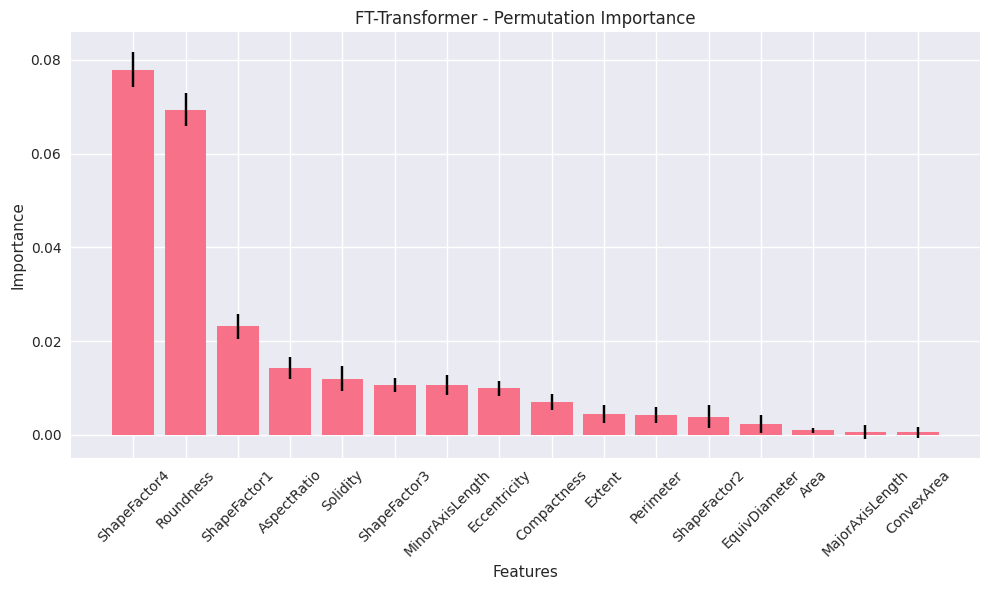

✅ Permutation importance analysis completed for FT-Transformer
🔄 Computing SHAP values for FT-Transformer...


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

<Figure size 800x550 with 0 Axes>

In [6]:
# Analyze FT-Transformer explainability
if 'FT-Transformer-Wrapper' in models:
    print("\n" + "="*60)
    print("FT-Transformer EXPLAINABILITY ANALYSIS")
    print("="*60)
    
    ft_transformer_explanations = explainer.analyze_model_explainability(
        models['FT-Transformer-Wrapper'], "FT-Transformer", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=100
    )
        # Save results after TabICL attempt
    save_intermediate_results({
        'explainer_state': explainer.explanations,
        'models_completed': ['XGBoost', 'TabPFN v2', 'TabICL', 'FT-Transformer']
    }, 'dry_bean_fttransformer_explanations.pkl')

    clear_memory()
    print("✅ FT-Transformer explainability analysis completed")
else:
    print("⚠️ FT-Transformer model not available")

## 3.6 Cross-Model Feature Importance Comparison

In [4]:
clear_memory()
def combine_explainability_results():
    """Combine results from different intermediate saves"""
    print("🔄 Combining explainability results from intermediate saves")
    
    # Load all available intermediate results
    xgb_results = load_intermediate_results('dry_bean_xgb_explanations.pkl')
    tabpfn_results = load_intermediate_results('dry_bean_tabpfn_explanations.pkl')
    tabicl_results = load_intermediate_results('dry_bean_tabicl_explanations.pkl')
    fttransformer_results = load_intermediate_results('dry_bean_fttransformer_explanations.pkl')
    
    combined_explanations = {}
    
    # Combine XGBoost results
    if xgb_results and 'explainer_state' in xgb_results:
        combined_explanations.update(xgb_results['explainer_state'])
        print("✅ XGBoost results added")
    
    # Combine TabPFN results
    if tabpfn_results and 'explainer_state' in tabpfn_results:
        combined_explanations.update(tabpfn_results['explainer_state'])
        print("✅ TabPFN results added")
    
    # Combine TabICL results
    if tabicl_results and 'explainer_state' in tabicl_results:
        combined_explanations.update(tabicl_results['explainer_state'])
        print("✅ TabICL results added")
    
    if fttransformer_results and 'explainer_state' in fttransformer_results:
        combined_explanations.update(fttransformer_results['explainer_state'])
        print("✅ FT-Transformer results added")
    
    return combined_explanations

combined_explanations = combine_explainability_results()

🧹 Memory cleared
🔄 Combining explainability results from intermediate saves
✅ XGBoost results added
✅ TabPFN results added
✅ TabICL results added
✅ FT-Transformer results added



CROSS-MODEL FEATURE IMPORTANCE COMPARISON

🔍 Feature Importance Comparison


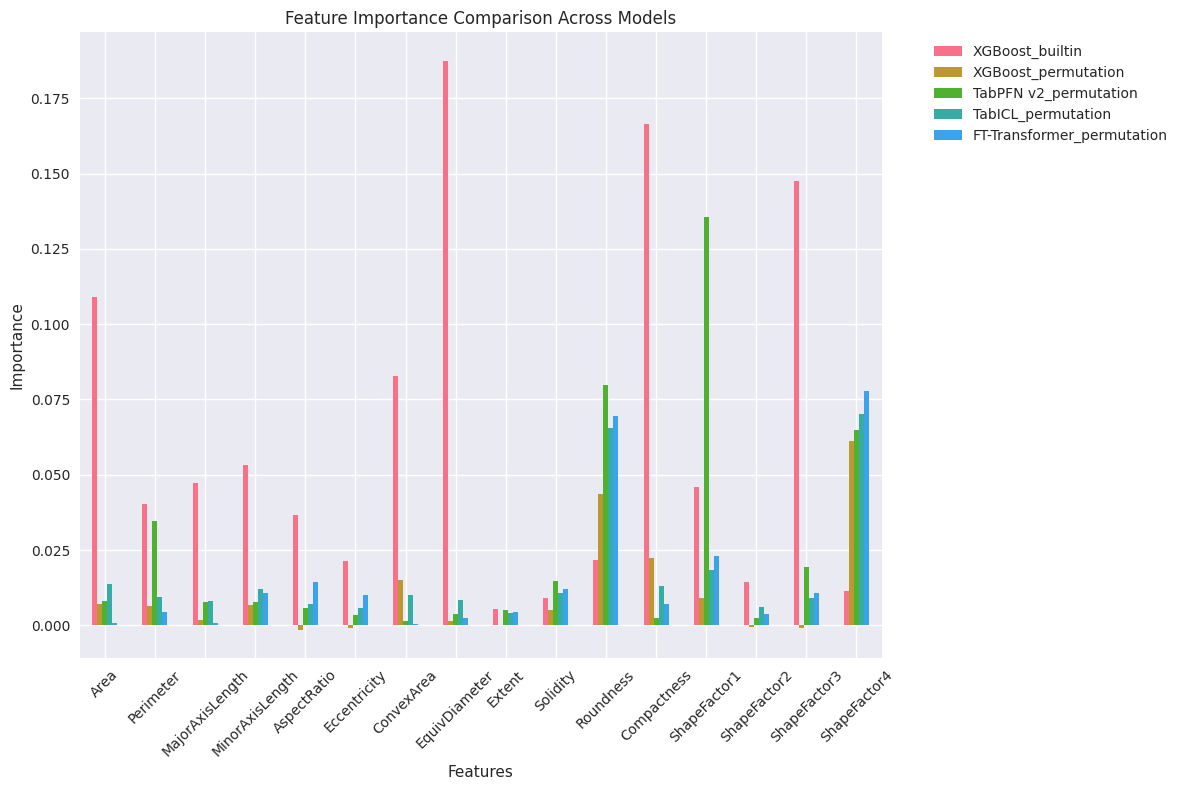


📊 Feature Importance Comparison Table:
                 XGBoost_builtin  XGBoost_permutation  TabPFN v2_permutation  TabICL_permutation  FT-Transformer_permutation
Area                      0.1089               0.0071                 0.0082              0.0138                      0.0010
Perimeter                 0.0404               0.0065                 0.0346              0.0094                      0.0043
MajorAxisLength           0.0471               0.0018                 0.0079              0.0080                      0.0007
MinorAxisLength           0.0534               0.0066                 0.0076              0.0122                      0.0107
AspectRatio               0.0367              -0.0014                 0.0056              0.0072                      0.0143
Eccentricity              0.0215              -0.0010                 0.0036              0.0057                      0.0100
ConvexArea                0.0827               0.0150                 0.0015         

<Figure size 800x550 with 0 Axes>

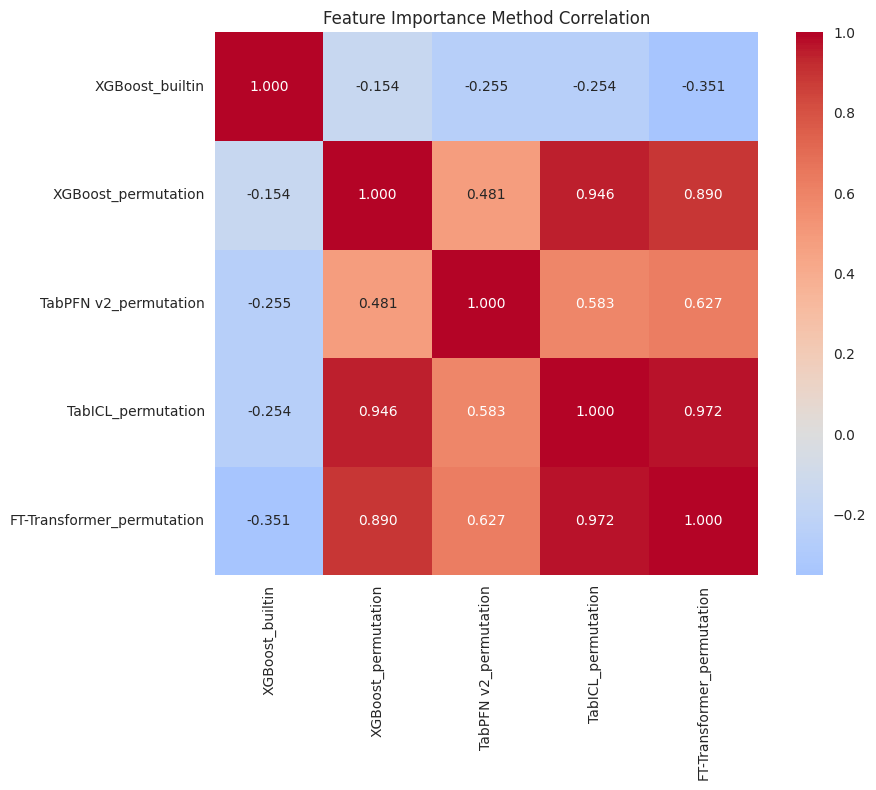

<Figure size 800x550 with 0 Axes>

In [5]:
# Compare feature importance across models
print("\n" + "="*60)
print("CROSS-MODEL FEATURE IMPORTANCE COMPARISON")
print("="*60)

importance_comparison = explainer.compare_feature_importance(explanations=combined_explanations)

if importance_comparison is not None:
    print("\n📊 Feature Importance Comparison Table:")
    print(importance_comparison.round(4).to_string())
    
    # Save comparison results
    importance_comparison.to_csv('dry_bean_feature_importance_comparison.csv')
    print("\n💾 Feature importance comparison saved to 'dry_bean_feature_importance_comparison.csv'")
    
    # Identify consensus features
    print("\n🎯 FEATURE IMPORTANCE CONSENSUS:")
    
    # Calculate average importance across all methods
    avg_importance = importance_comparison.mean(axis=1).sort_values(ascending=False)
    
    print("\nTop 10 Most Important Features (Average Across All Methods):")
    for i, (feature, importance) in enumerate(avg_importance.head(10).items()):
        print(f"   {i+1:2d}. {feature}: {importance:.4f}")
    
    # Feature importance correlation between methods
    print("\n🔗 Feature Importance Correlation Between Methods:")
    correlation_matrix = importance_comparison.corr()
    print(correlation_matrix.round(3).to_string())
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Feature Importance Method Correlation')
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_importance_correlation.png', dpi=300, bbox_inches='tight')
else:
    print("❌ No feature importance data available for comparison")

## 3.7 Generate Explanation Reports

In [6]:
# Generate detailed explanation reports for each model
    
print("\n" + "="*60)
print("DETAILED EXPLANATION REPORTS")
print("="*60)

for model_name in models.keys():
    explainer.generate_explanation_report(model_name)
    print("\n" + "-"*40)


DETAILED EXPLANATION REPORTS

📋 Explainability Report for XGBoost

🎯 Top 5 Most Important Features (Built-in):
   1. EquivDiameter: 0.1874
   2. Compactness: 0.1665
   3. ShapeFactor3: 0.1474
   4. Area: 0.1089
   5. ConvexArea: 0.0827

🔄 Top 5 Most Important Features (Permutation):
   1. ShapeFactor4: 0.0613
   2. Roundness: 0.0437
   3. Compactness: 0.0224
   4. ConvexArea: 0.0150
   5. ShapeFactor1: 0.0090

🎭 Top 5 Most Important Features (SHAP):
   1. ShapeFactor1: 0.6819
   2. MinorAxisLength: 0.5897
   3. Compactness: 0.5393
   4. ConvexArea: 0.4816
   5. Area: 0.4523

✅ Explainability analysis complete for XGBoost

----------------------------------------

📋 Explainability Report for TabPFN v2

🔄 Top 5 Most Important Features (Permutation):
   1. ShapeFactor1: 0.1357
   2. Roundness: 0.0799
   3. ShapeFactor4: 0.0650
   4. Perimeter: 0.0346
   5. ShapeFactor3: 0.0193

✅ Explainability analysis complete for TabPFN v2

----------------------------------------

📋 Explainability Re

## 3.8 Summary and Insights

In [7]:
# Generate comprehensive summary of explainability findings
print("\n" + "="*80)
print("EXPLAINABILITY ANALYSIS SUMMARY")
print("="*80)

# Model performance recap
print("\n🏆 MODEL PERFORMANCE RECAP:")
if comparison_df is not None:
    print(comparison_df[['accuracy', 'f1', 'precision', 'recall']].round(4).to_string())
else:
    print("Model comparison data not available")

# Feature importance insights
print("\n🎯 KEY FEATURE IMPORTANCE INSIGHTS:")
if importance_comparison is not None:
    avg_importance = importance_comparison.mean(axis=1).sort_values(ascending=False)
    print("\nMost Important Features for Dry Bean Classification:")
    for i, (feature, importance) in enumerate(avg_importance.head(5).items()):
        print(f"   {i+1}. {feature}: {importance:.4f}")
    
    print(f"\nFeature Importance Consensus: {len(avg_importance)} features analyzed")
    print(f"Top feature: {avg_importance.index[0]} ({avg_importance.iloc[0]:.4f})")
else:
    print("Feature importance data not available")

# Model interpretability insights
print("\n🔍 MODEL INTERPRETABILITY INSIGHTS:")
print("\n1. XGBoost:")
print("   - Most interpretable with built-in feature importance")
print("   - Tree-based structure allows for clear decision paths")
print("   - SHAP values provide detailed feature contributions")

print("\n2. TabPFN v2:")
print("   - Prior-based model with limited interpretability")
print("   - Relies on permutation importance and SHAP for explanations")
print("   - Black-box nature makes feature interactions unclear")

print("\n3. TabICL:")
print("   - In-context learning approach")
print("   - Interpretability through example-based reasoning")
print("   - Context examples influence decision making")

# Key findings
print("\n📋 KEY FINDINGS:")
print("\n• Dry bean classification relies on geometric and shape-based features")
print("• Different models may prioritize different feature combinations")
print("• Feature importance consensus helps identify robust predictors")
print("• Model interpretability varies significantly across architectures")

print("\n✅ Section 3 completed successfully!")
print("📊 Comprehensive explainability analysis finished")
print("📁 All results and visualizations saved")


EXPLAINABILITY ANALYSIS SUMMARY

🏆 MODEL PERFORMANCE RECAP:
                accuracy        f1 precision    recall
XGBoost         0.920676  0.920674  0.920874  0.920676
TabPFN v2        0.92949  0.929362   0.92948   0.92949
TabICL          0.929857  0.929714  0.929731  0.929857
FT-Transformer  0.925083  0.925318  0.925992  0.925083

🎯 KEY FEATURE IMPORTANCE INSIGHTS:

Most Important Features for Dry Bean Classification:
   1. ShapeFactor4: 0.0572
   2. Roundness: 0.0560
   3. ShapeFactor1: 0.0464
   4. Compactness: 0.0423
   5. EquivDiameter: 0.0407

Feature Importance Consensus: 16 features analyzed
Top feature: ShapeFactor4 (0.0572)

🔍 MODEL INTERPRETABILITY INSIGHTS:

1. XGBoost:
   - Most interpretable with built-in feature importance
   - Tree-based structure allows for clear decision paths
   - SHAP values provide detailed feature contributions

2. TabPFN v2:
   - Prior-based model with limited interpretability
   - Relies on permutation importance and SHAP for explanations
   

In [8]:
# Save final results for future reference
import pickle

# Save explainability results
section3_data = {
    'explainer': explainer,
    'importance_comparison': importance_comparison if 'importance_comparison' in locals() else None,
    'models': models,
    'feature_names': feature_names,
    'class_names': class_names,
    'explanations': explainer.explanations
}

# Save to pickle file
with open('dry_bean_section3_explainability.pkl', 'wb') as f:
    pickle.dump(section3_data, f)

print("💾 Section 3 explainability results saved to 'dry_bean_section3_explainability.pkl'")
print("📋 This file contains all explainability analysis results")

💾 Section 3 explainability results saved to 'dry_bean_section3_explainability.pkl'
📋 This file contains all explainability analysis results
